In [1]:
import tweepy
import json
import random
import os
import pandas as pd
import time
from tqdm import tqdm
from pprint import pprint
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from twifex import *

In [2]:
twifex = Twifex()

In [3]:
consumer_key = "aPp14u2pIZo1nzwbNIHRTgsMR"
consumer_secret = "R20ioXz0eY2wsiShdgnamAjeZ0pzl6kMCptLcCgRvbIAw5SdnB"
access_token = "3341529021-f9xFmfjPrY2ETpkt8MFE1mYVth7EVJyLOoRpJ73"
access_token_secret = "KFKUjpEmydy3gi6vYNB9PZr0gAwALwDbegV6EW2xyVpAA"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [5]:
path1 = "./tests/new_tweets/"
path2 = "./tests/people_timeline/"
path3 = "./tests/modified_tweets/"

In [6]:
new_tweets = []
for file in tqdm([i for i in os.listdir(path1) if os.path.isfile(path1+i)]):
    if ".json" in file:
        new_tweets.append(twifex.single_tweet(path1+file))
    else:
        pass

timeline_tweets = []
for file in tqdm([i for i in os.listdir(path2) if os.path.isfile(path2+i)]):
    if ".json" in file:
        timeline_tweets.append(twifex.single_tweet(path2+file))
    else:
        pass

modified_tweets = []
for file in tqdm([i for i in os.listdir(path3) if os.path.isfile(path3+i)]):
    if ".json" in file:
        modified_tweets.append(twifex.single_tweet(path3+file))
    else:
        pass

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 83.54it/s]


In [7]:
_tweets = timeline_tweets

In [8]:
# df = pd.read_csv("./tests/new_tweets/vaccine_tweet_data.csv").sort_index(ascending=False)

In [9]:
# pd.read_csv("./tests/new_tweets/vaccine_tweet_data.csv")

In [10]:
# for i in df["id"]:
#     try:
#         tweet_obj = api.get_status(i, tweet_mode='extended')._json
#         json.dump(tweet_obj, open(path1 + tweet_obj['id_str'] + ".json", "w"))
#     except:
#         print(str(i)+" does not exist")

# Collecting my timeline tweets

In [53]:
jsons = []
public_tweets = api.user_timeline(screen_name="ginasue", tweet_mode='extended')
for tweet in public_tweets:
    tweet_obj = tweet._json
    jsons.append(tweet._json)
    json.dump(tweet_obj, open(path2 + tweet_obj['id_str'] + ".json", "w"))

In [65]:
 # jsons[5]

# Collecting a single tweet

In [49]:
tweet_object = api.get_status("1451544265444708357", tweet_mode='extended')

In [43]:
tweet_obj = tweet_object._json
json.dump(tweet_obj, open(path2 + tweet_obj['id_str'] + ".json", "w"))

In [47]:
a = []

In [50]:
a.append(tweet_object)

In [66]:
# pprint(a[1]._json)

In [22]:
# tweet_object._json

# Tweet collection using search function

In [111]:
tweet_obj = []
tweet_repo = []

In [127]:
path3 = "./tests/searched_tweets/"

In [113]:
query="crisis"

In [115]:
counter = 0
while(True):
    try:
        tweet_obj = api.search(query, tweet_mode='extended')
        counter += 1
        for tweet in tweet_obj:
            tweet = tweet._json
            json.dump(tweet, open(path3 + tweet['id_str'] + ".json", "w"))
            tweet_repo.append(tweet)
        if counter == 450:
            time.sleep(900)
            counter = 0
    except:
        break

In [116]:
files = [i for i in os.listdir(path3) if os.path.isfile(path3+i)]
retweets = []


for file in files:
    tw = json.load(open(path3+file))
    if tw["retweeted"]:
        retweets.append(tw)

In [117]:
len(retweets)

0

# Testing collected tweets

In [11]:
twifex = Twifex()

In [12]:
Q = []
twf = []
for file in os.listdir(path2):
    Q.append(json.load(open(path2+file)))
    twf.append(twifex.single_tweet(path2+file))

In [13]:
f1, f2, f3, f4 = [], [], [], []
twf1, twf2, twf3, twf4 = [], [], [], []

In [14]:
len(Q)

305

In [15]:
for tweet in tqdm(Q):
    if 'retweeted_status' in tweet.keys():
        if 'quoted_status' in tweet['retweeted_status'].keys():
            f4.append(tweet)
        else:
            f2.append(tweet)
    elif 'quoted_status' in tweet.keys():
        f3.append(tweet)
    else:
        f1.append(tweet)
        
        
        
for tweet in tqdm(twf):
    if tweet.is_retweeted():
        if tweet.get_retweeted().is_quoted():
            twf4.append(tweet)
        else:
            twf2.append(tweet)
    elif tweet.is_quoted():
        twf3.append(tweet)
    else:
        twf1.append(tweet)

100%|████████████████████████████████████████████████████████████████████████████| 305/305 [00:00<00:00, 305022.11it/s]


In [16]:
print(len(f1), len(f2), len(f3), len(f4))

120 124 29 32


In [17]:
len(_tweets)

305

In [18]:
f1_dict = {}
for item in f1:
    for key in item.keys():
        f1_dict[key] = f1_dict.get(key, 0) + 1
f1_set = set(f1_dict.keys())
        
        
f2_dict = {}
for item in f2:
    for key in item.keys():
        f2_dict[key] = f2_dict.get(key, 0) + 1
f2_set = set(f2_dict.keys())
        
        
f3_dict = {}
for item in f3:
    for key in item.keys():
        f3_dict[key] = f3_dict.get(key, 0) + 1
f3_set = set(f3_dict.keys())
        

f4_dict = {}
for item in f4:
    for key in item.keys():
        f4_dict[key] = f4_dict.get(key, 0) + 1
f4_set = set(f4_dict.keys())

In [19]:
key_union = f1_set.union(f2_set, f3_set, f4_set)
key_list = list(key_union)

In [20]:
grand_list = {}
for i in key_list:
    if i in f1_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f1_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]
        
    if i in f2_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f2_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]    
        
    if i in f3_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f3_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]   
        
    if i in f4_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f4_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]

In [21]:
print(len(f1_dict.keys()), len(f2_dict.keys()), len(f3_dict.keys()), len(f4_dict.keys()))

29 27 31 29


In [22]:
grand_list

{'retweeted_status': [0, 124, 0, 32],
 'in_reply_to_screen_name': [120, 124, 29, 32],
 'favorited': [120, 124, 29, 32],
 'contributors': [120, 124, 29, 32],
 'retweeted': [120, 124, 29, 32],
 'possibly_sensitive_appealable': [0, 0, 2, 0],
 'in_reply_to_user_id_str': [120, 124, 29, 32],
 'geo': [120, 124, 29, 32],
 'favorite_count': [120, 124, 29, 32],
 'full_text': [120, 124, 29, 32],
 'retweet_count': [120, 124, 29, 32],
 'created_at': [120, 124, 29, 32],
 'id_str': [120, 124, 29, 32],
 'place': [120, 124, 29, 32],
 'in_reply_to_status_id': [120, 124, 29, 32],
 'possibly_sensitive': [50, 22, 29, 2],
 'source': [120, 124, 29, 32],
 'quoted_status_id_str': [2, 0, 29, 32],
 'quoted_status_id': [2, 0, 29, 32],
 'coordinates': [120, 124, 29, 32],
 'display_text_range': [120, 124, 29, 32],
 'id': [120, 124, 29, 32],
 'in_reply_to_user_id': [120, 124, 29, 32],
 'quoted_status': [0, 0, 29, 0],
 'entities': [120, 124, 29, 32],
 'quoted_status_permalink': [2, 0, 29, 32],
 'user': [120, 124, 29,

In [23]:
df = pd.DataFrame.from_dict(grand_list, orient='index')

<AxesSubplot:>

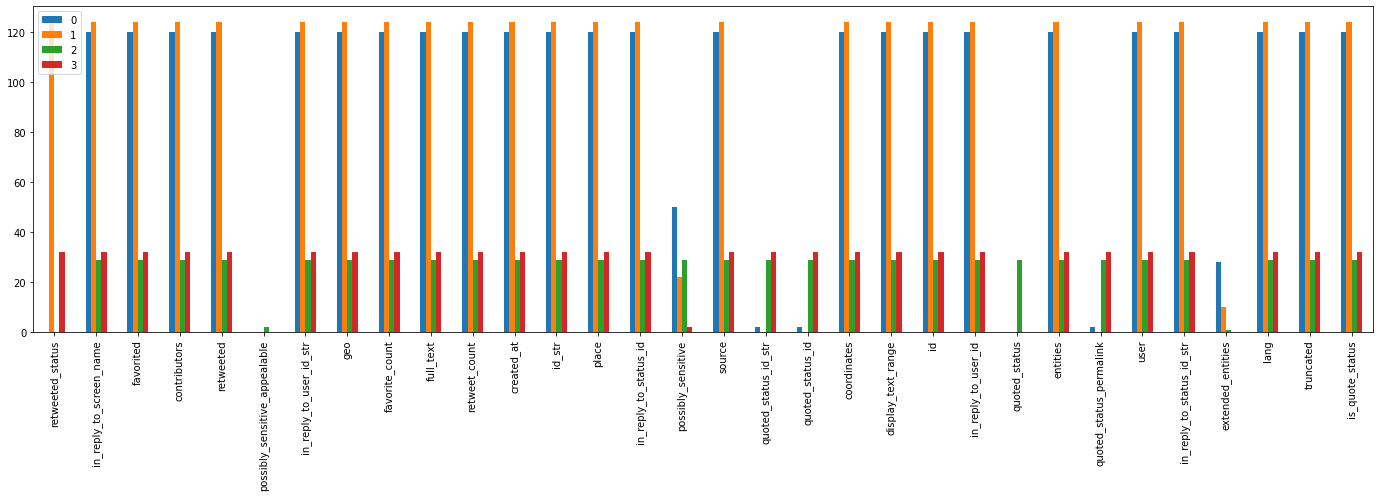

In [24]:
df.plot(kind='bar', figsize=(24,6))

In [25]:
len(twf3)

31

In [26]:
len(Q)

305

In [27]:
t = []

In [28]:
for i in twf:
    if i.get_id() == 1308539697711415296:
        t.append(i)

In [29]:
t[0].is_quoted()

True

In [30]:
s= t[0].get_text()

In [31]:
s

'I finished interacting with a "prestigious" journal in the #urban space about my paper\'s handling. The overall experience of receiving destructive comments, raising a concern, and getting more demeaning comments back, has not surprised me. \n\nSo a thread on peer review ⬇️ https://t.co/t5unsnKYEj'

In [204]:
t[0].get_tweet()["is_quote_status"]

True

In [205]:
t[0].is_quoted()

True

In [35]:
t[0].is_quote_available()

False

In [196]:
pprint(t[0].get_tweet())

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Sep 22 22:52:30 +0000 2020',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [72, 78], 'text': 'urban'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 1049255245031854080,
                                 'id_str': '1049255245031854080',
                                 'indices': [3, 11],
                                 'name': 'Trivik Verma',
                                 'screen_name': 'TrivikV'}]},
 'favorite_count': 0,
 'favorited': True,
 'full_text': 'RT @TrivikV: I finished interacting with a "prestigious" '
              "journal in the #urban space about my paper's handling. The "
              'overall experience of r…',
 'geo': None,
 'id': 1308539697711415296,
 'id_str': '1308539697711415296',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply